# Breast Cancer Wisconsin (Diagnostic) Prediction
*Predict whether the cancer is benign or malignant*

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

**Attribute Information:**

*1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)*

**Ten real-valued features are computed for each cell nucleus:**

*a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)*

*he mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.*

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns # used for plot interactive graph. I like it most for plot
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data Cleaning

In [63]:
#df is dataframe and its self a variable & here i import the dataset into this variable
df=pd.read_csv("cancer.csv")
#it will show top 5 data rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [64]:
#deleting the useless columns
df.drop(['id'], 1, inplace=True)
df.drop(['Unnamed: 32'], 1, inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [66]:
# lets now start with features_mean 
# now as ou know our diagnosis column is a object type so we can map it to integer value
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [107]:
y=df['diagnosis']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [68]:
# it will describe the all statistical function of our data
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Data Analysis

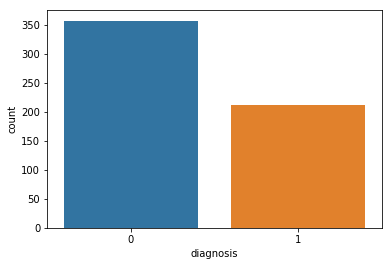

In [71]:
# plotting the diagonisis result 
sns.countplot(df['diagnosis'],label="Count")

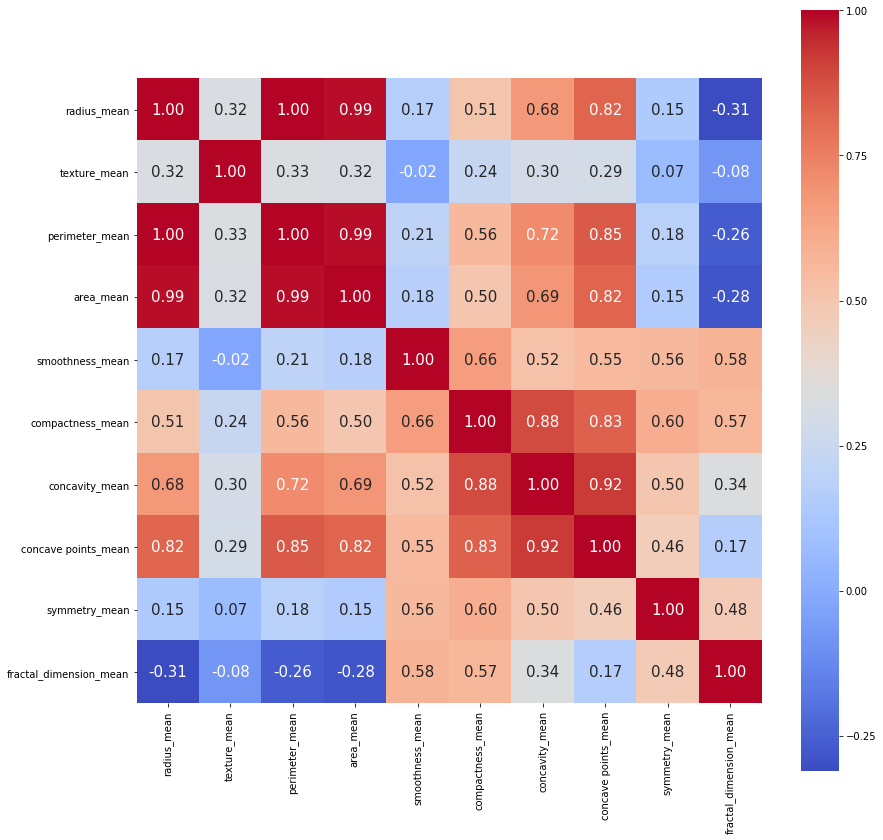

In [75]:
feat_mean= list(df.columns[1:11])
feat_se= list(df.columns[11:20])
feat_worst=list(df.columns[21:31])

corr = df[feat_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= feat_mean, yticklabels= feat_mean,
           cmap= 'coolwarm') # for more on heatmap you can visit Link(http://seaborn.pydata.org/generated/seaborn.heatmap.html)

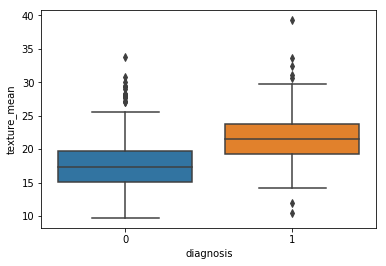

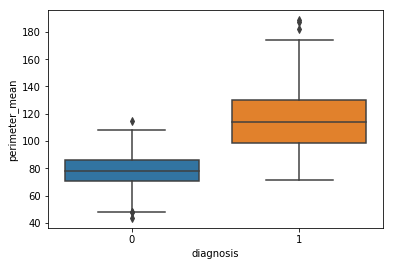

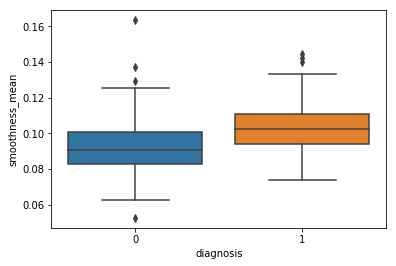

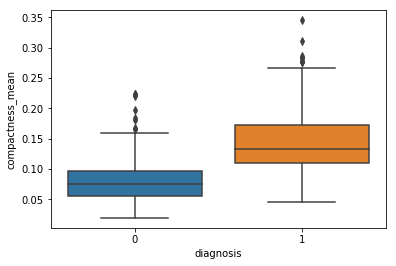

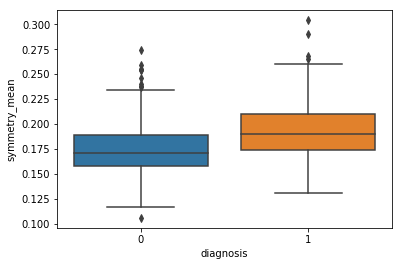

In [112]:
#Box Plot for the feature texture_mean
sns.boxplot(x = 'diagnosis', y ='texture_mean', data = df)
plt.show()

#Box Plot for the feature perimeter_mean
sns.boxplot(x = 'diagnosis',y = 'perimeter_mean', data = df)
plt.show()

#Box Plot for the feature smoothness_mean
sns.boxplot(x = 'diagnosis', y = 'smoothness_mean', data = df)
plt.show()

#Box Plot for the feature compactness_mean
sns.boxplot(x = 'diagnosis', y = 'compactness_mean', data = df)
plt.show()

#Box Plot for the feature symmetry_mean
sns.boxplot(x = 'diagnosis', y = 'symmetry_mean', data = df)
plt.show()

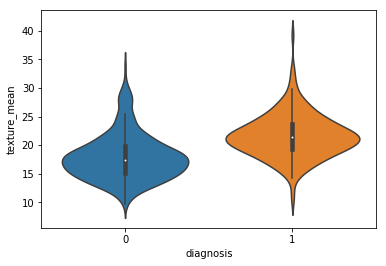

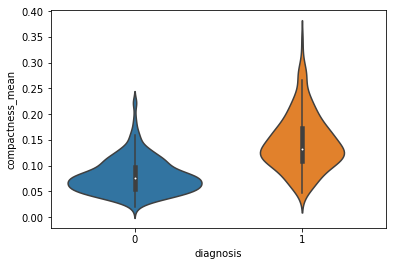

In [113]:
#Violin Plots for texture_mean
sns.violinplot(x = 'diagnosis', y ='texture_mean', data = df, size = 8)
plt.show()

#Violin Plots for compactness_mean
sns.violinplot(x = 'diagnosis', y = 'compactness_mean', data = df, size = 8)
plt.show()

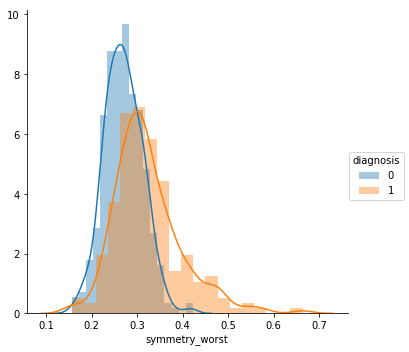

In [110]:
#Histogram of Axillary_Nodes
sns.FacetGrid(df, hue = "diagnosis", size=5).map(sns.distplot, "symmetry_worst").add_legend();
plt.show();

In [76]:
#taking the main parameters in a single variable 
main_pred_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

# Spliting the Dataset into two part

In [98]:
# spliting the dataset into two part
train_set,test_set=train_test_split(df, test_size=0.2)
#printing the data shape
print(train_set.shape)
print(test_set.shape)

(455, 31)
(114, 31)


**Training Set :**

In [102]:
x_train=train_set[main_pred_var]
y_train=train_set.diagnosis

In [103]:
print(y_train.shape)
print(x_train.shape)

(455,)
(455, 5)


**Test Set :**

In [104]:
x_test=test_set[main_pred_var]
y_test=test_set.diagnosis
print(y_test.shape)
print(x_test.shape)

(114,)
(114, 5)


<h1 align="center">Various Algorithm</h1>
<br>Now i will train this Breast cancer dataset using various Algorithm from scratch see how each of them behaves with respect to one another.

<ul>
    <li>Random Forest</li>
    <li>SVM</li>
</ul>

# RandomForst Algorithm 

In [117]:
#define the algorithm class into the algo_one variable
algo_one=RandomForestClassifier()
algo_one.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [122]:
#predicting the algorithm into the non trained dataset that is test set 
prediction = algo_one.predict(x_test)
metrics.accuracy_score(prediction,y_test)

0.956140350877193

# SupportVector Machine Algorithm (SVM)

In [126]:
algo_two=svm.SVC()
algo_two.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [127]:
#predicting the algorithm into the non trained dataset that is test set 
prediction = algo_two.predict(x_test)
metrics.accuracy_score(prediction,y_test)

0.9035087719298246

# Decision Tree Classifier Algorithm

In [128]:
algo_three=DecisionTreeClassifier()
algo_three.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [129]:
#predicting the algorithm into the non trained dataset that is test set 
prediction = algo_three.predict(x_test)
metrics.accuracy_score(prediction,y_test)

0.9298245614035088

# K-Nearest NeighborsClassifier Algorithm

In [130]:
algo_four=KNeighborsClassifier()
algo_four.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [131]:
#predicting the algorithm into the non trained dataset that is test set 
prediction = algo_four.predict(x_test)
metrics.accuracy_score(prediction,y_test)

0.9473684210526315

# GaussianNB Algorithm

In [136]:
algo_five=GaussianNB()
algo_five.fit(x_train,y_train)

GaussianNB(priors=None)

In [137]:
prediction = algo_five.predict(x_test)
metrics.accuracy_score(prediction,y_test)

0.9385964912280702

<h1 align="center">Tuning Parameters using grid search CV</h1>

Lets Start with Random Forest Classifier Tuning the parameters means using the best parameter for predict there are many parameters need to model a Machine learning Algorithm for RandomForestClassifier.

In [144]:
pred_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
#creating new variable
x_grid= df[pred_var]
y_grid= df["diagnosis"]

In [145]:
# lets Make a function for Grid Search CV
def Classification_model_gridsearchCV(model,param_grid,x_grid,y_grid):
    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    # this is how we use grid serch CV we are giving our model
    # the we gave parameters those we want to tune
    # Cv is for cross validation
    # scoring means to score the classifier
    
    clf.fit(x_train,y_train)
    print("The best parameter found on development set is :")
    # this will gie us our best parameter to use
    print(clf.best_params_)
    print("the bset estimator is ")
    print(clf.best_estimator_)
    print("The best score is ")
    # this is the best score that we can achieve using these parameters#
    print(clf.best_score_)

In [147]:
# you will understand these terms once you follow the link above
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }
# here our gridasearchCV will take all combinations of these parameter and apply it to model 
# and then it will find the best parameter for model
model= RandomForestClassifier()
Classification_model_gridsearchCV(model,param_grid,x_grid,y_grid)

The best parameter found on development set is :
{'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 6}
the bset estimator is 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
The best score is 
0.9384615384615385


# Observation
<html>
<body>
    <br>
    <b>Here are the results of our Five Algorithm observation</b> 
<table border=1>
  <tr>
    <th>Model</th>
    <th>Algorithm</th>
    <th>Test Accuracy</th>
  </tr>
  <tr>
    <td>Model 1</td>
    <td>Random Forest Algorithm</td>
    <td>95%</td>
  </tr>
  <tr>
    <td>Model 2</td>
    <td>SupportVector Machine Algorithm (SVM)</td>
    <td>90%</td>
  </tr>
  <tr>
    <td>Model 3</td>
    <td>Decision Tree Classifier Algorithm</td>
    <td>92%</td>
  </tr>
      <tr>
    <td>Model 4</td>
    <td>K-Nearest NeighborsClassifier Algorithm</td>
    <td>94.7%</td>
  </tr>
      <tr>
    <td>Model 5</td>
    <td>GaussianNB Algorithm</td>
    <td>93.8%</td>
  </tr>
</table>
</body>
</html>